In [0]:
from sklearn.cluster import KMeans
from skimage.io import imread
import pylab
import skimage
import numpy as np
from math import log, sqrt, pow
from skimage.measure import compare_psnr 
from skimage.metrics import peak_signal_noise_ratio

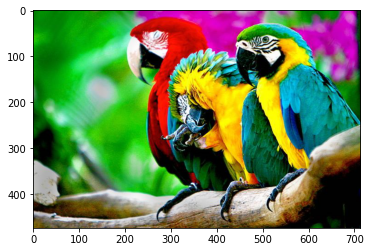

In [4]:
image = imread('parrots.jpg')
%matplotlib inline
pylab.imshow(image)

In [0]:
image_norm = skimage.img_as_float(image)

In [0]:
objects_features_list = []
for i in range(len(image_norm)):
        for j in range(len(image_norm[i])):
            #print(image_norm[i][j])
            objects_features_list.append([i,j, image_norm[i][j][0],image_norm[i][j][1],image_norm[i][j][2]])


In [0]:
objects_features = np.array(objects_features_list)

In [0]:
def psnr_cluster_number_optimization(n_clusters, objects_features):
  
  clusterizer = KMeans(init='k-means++', random_state=241, n_clusters=n_clusters)
  labels = clusterizer.fit_predict(X=objects_features[:,2:5])    
  clusters = []
  for i in range(len(objects_features)):
      clusters.append([objects_features[i][0],objects_features[i][1],objects_features[i][2],objects_features[i][3],
      objects_features[i][4], labels[i]])
    
  print('clusters completed for ', n_clusters)

  np_clusters = np.array(clusters)
    
  clust_stats = {}
  for n in range(clusterizer.n_clusters):
      curr_clust = np_clusters[np.where(np_clusters[:,5]==n)]
      clust_mean = [np.mean(curr_clust[:, 2]),np.mean(curr_clust[:, 3]),np.mean(curr_clust[:, 4])]
      #clust_median = [np.median(curr_clust[:, 2]),np.median(curr_clust[:, 3]),np.median(curr_clust[:, 4])]
      clust_stats[n]= {'clust_mean':clust_mean, 'clust_median':clust_median}
    
  print('clusters statistics completed for ', n_clusters)
    
  np_clusters_mean = [] 
  for n in range(clusterizer.n_clusters):
      for k in np_clusters[np.where(np_clusters[:,5]==n)]:
          k[2]=clust_stats[n]['clust_mean'][0]
          k[3]=clust_stats[n]['clust_mean'][1]
          k[4]=clust_stats[n]['clust_mean'][2]       
          np_clusters_mean.append(k)
  mean_arr = np.array(np_clusters_mean)
            
  print('mean clusters completed for ', n_clusters)

  '''   
  np_clusters_median = [] 
  for n in range(clusterizer.n_clusters):
      for k in np_clusters[np.where(np_clusters[:,5]==n)]:
          k[2]=clust_stats[n]['clust_median'][0]
          k[3]=clust_stats[n]['clust_median'][1]
          k[4]=clust_stats[n]['clust_median'][2]       
          np_clusters_mean.append(k)
  median_arr = np.array(np_clusters_median)
    
  print('median clusters completed for ', n_clusters)
  '''                                
  image_mean = np.empty((474, 713,3))
  for l in range(474):
      for m in range(713):
          image_mean[l][m][0] = mean_arr[np.where((mean_arr[:,0]==l)&(mean_arr[:,1]==m))][0][2]
          image_mean[l][m][1] = mean_arr[np.where((mean_arr[:,0]==l)&(mean_arr[:,1]==m))][0][3]
          image_mean[l][m][2] = mean_arr[np.where((mean_arr[:,0]==l)&(mean_arr[:,1]==m))][0][4]
    
  print('mean image completed for ', n_clusters)
    
  '''   
  image_median = np.empty((474, 713,3))
  for l in range(474):
      for m in range(713):
          image_median[l][m][0] = median_arr[np.where((median_arr[:,0]==l)&(median_arr[:,1]==m))][0][2]
          image_median[l][m][1] = median_arr[np.where((median_arr[:,0]==l)&(median_arr[:,1]==m))][0][3]
          image_median[l][m][2] = median_arr[np.where((median_arr[:,0]==l)&(median_arr[:,1]==m))][0][4]
    
  print('median image completed for ', n_clusters)
  '''    
  %matplotlib inline
  pylab.imshow(image_mean)
  #pylab.imshow(image_median)
                                
  PSNR_mean = compare_psnr(image_norm,image_mean)  
  #PSNR_median = compare_psnr(image_norm,image_median)
    
  print('for ', n_clusters, 'PSNR_mean = ', PSNR_mean) #, 'PSNR_median = ',PSNR_median)

  return PSNR_mean

In [0]:
for n_clusters in range(9,21,1):
    psnr_cluster_number_optimization(n_clusters=n_clusters, objects_features=objects_features)

clusters completed for  9
clusters statistics completed for  9
mean clusters completed for  9
